# Homework 3


### Problem 1 (5% credit). 
Consider a multivariate regression of the output variable y over the 3
regressors regressors x_1, x_2, x_3, with the observations from the file stored under the following link:
https://serv.cusp.nyu.edu/files/ADS-2015/MorningSection/homework3/H31.csv
(also see below)
Which one of the regressors is a dummy variable corresponding to an intercept term?

In [1]:
import numpy as np
from numpy import random
from scipy import stats
import matplotlib.pyplot as plt
%pylab inline
import pandas as pd
import statsmodels.formula.api as smf
data=pd.read_csv('https://serv.cusp.nyu.edu/files/ADS-2015/MorningSection/homework3/H31.csv', index_col=0)
data.head()

Populating the interactive namespace from numpy and matplotlib


,y,x1,x2,x3
1,0,1,-2,1
2,2,1,-1,-1
3,2,1,0,0
4,3,1,1,-1
5,3,1,2,1


Answer 1: The dummy variable corresponding to an intercept term is x1 = 1 since its value remains constant throughout.

### Problem 2 (15% credit). 
For the data from the problem 1 perform a manual estimate for the least-square multivariate regression coefficients  (not using regression tools, but using appropriate matrix operations and formula (3) from the session notebook).

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     13.36
Date:                Sun, 04 Oct 2015   Prob (F-statistic):             0.0354
Time:                        19:43:19   Log-Likelihood:                -3.3094
No. Observations:                   5   AIC:                             10.62
Df Residuals:                       3   BIC:                             9.838
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.0000      0.135      7.385      0.0

C:\Users\Neil\Anaconda\lib\site-packages\statsmodels\stats\stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n))


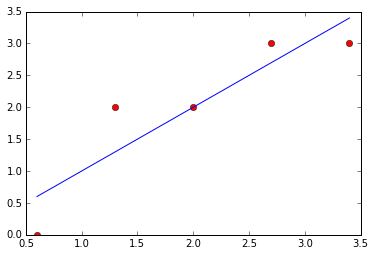

In [2]:
#Answer 2:
X=np.matrix(pd.DataFrame({'intercept': data.x1,'x1':data.x2,'x2':data.x3}))
Y=np.matrix(data.y).transpose()
w=pow((X.transpose()*X),-1)*X.transpose()*Y
lm = smf.ols(formula='y ~ x1+x2', data = data).fit()
print(lm.summary())
lmy = lm.predict(data)
plt.plot(lmy,data.y,'or')
plt.plot(lmy,lmy,'-b')   

## Problem 3 (15% of credit)
Prove that regressors x1,x2,x3 are mutually ortogonal. Perform an estimate for regression coefficients using uni-variate regressions formulas. Compare with the results of problem 2.

In [3]:
# Answer 3:
X=np.matrix(data)
cov=(X[:,1:4]).transpose()*(X[:,1:4])/100
print cov
print(cov>1e-10)
w1=float(sum(data.y*data.x2)/5)
w2=float(sum(data.y*data.x3)/5)
print([w1,w2])
print(lm.params)

[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[False False False]
 [False False False]
 [False False False]]
[1.0, -1.0]
Intercept    1.0
x1           1.0
x2           0.7
dtype: float64


Since the inner product of regressors equals zero (cov matrix), the regressors are orthogonal.
The estimate for regression values using uni-variate formulas results in the same values as those in Problem 2.

### Problem 4 (5% credit)
Suppose that a multiple regression with 7 regressors gave the following p-values for each of them:
0.01, 1e-15, 0.1, 0.04, 0.001, 0.06, 0.03
How many regressors you would exclude based on that? Please explain.

Answer 4: I would probably eliminate some combination of the regressors with p-values 0.1, 0.06 and maybe 0.04 respectively (or all three) as they have higher p-values as compared to the other regressors. A higher p-value indicates that there is some correlation and hence we may not need those regressors.

### Problem 6 (20% credit)
Perform a multivariate regression of y over x1,x2,x3,x4,x5 (with an intercept) using the observations from: https://serv.cusp.nyu.edu/files/ADS-2015/MorningSection/homework3/H32.csv

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     581.7
Date:                Sun, 04 Oct 2015   Prob (F-statistic):           4.76e-69
Time:                        19:43:30   Log-Likelihood:                -220.81
No. Observations:                 100   AIC:                             453.6
Df Residuals:                      94   BIC:                             469.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.2251      0.648     -0.347      0.7

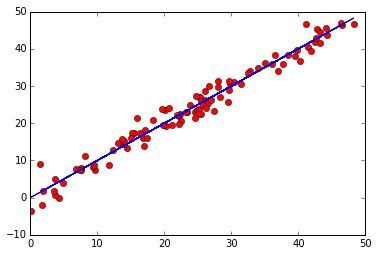

In [4]:
# Answer 6:
data2=pd.read_csv('https://serv.cusp.nyu.edu/files/ADS-2015/MorningSection/homework3/H32.csv', index_col=0)
data2.head()
validation=data2[70:99]
data=data2[0:69]
lm = smf.ols(formula='y ~ x1+x2+x3+x4+x5', data = data2).fit()
print(lm.summary())
lmy = lm.predict(data2)
plt.plot(lmy,data2.y,'or')
plt.plot(lmy,lmy,'-b') 

### Problem 7 (20% credit)
Perform the same regression as from the problem 5 but after standardization of the regressors. Report the regressor having the highest impact on the responce variable.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     581.7
Date:                Sun, 04 Oct 2015   Prob (F-statistic):           4.76e-69
Time:                        19:43:33   Log-Likelihood:                -220.81
No. Observations:                 100   AIC:                             453.6
Df Residuals:                      94   BIC:                             469.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     23.8651      0.227    105.095      0.000        23.414    24.316
x1             0.0231      0.236      0.098      0.922        -0.445     0.491
x2            -0.3145      0.237     -1.329      0.187        -0.784     0.155
x3            11.0882      0.240     46.266      0.000        10.612    11.564
x4            -2.7646      0.238    -11.600      0.000        -3.238    -2.291
x5             3.0308      0.232     13.070      0.000         2.570     3.491
==============================================================================
Omnibus:                        7.114   Durbin-Watson:                   2.134
Prob(Omnibus):                  0.029   Jarque-Bera (JB):                6.748
Skew:                           0.521   Prob(JB):                       0.0342
Kurtosis:                       3.732   Cond. No.                         1.48
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

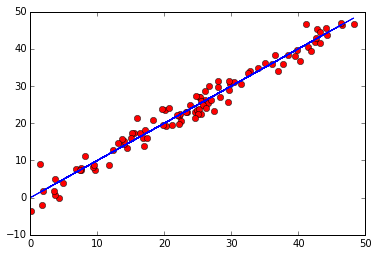

In [5]:
# Answer 7:
data2.x1=(data2.x1-mean(data2.x1))/std(data2.x1)
data2.x2=(data2.x2-mean(data2.x2))/std(data2.x2)
data2.x3=(data2.x3-mean(data2.x3))/std(data2.x3)
data2.x4=(data2.x4-mean(data2.x4))/std(data2.x4)
data2.x5=(data2.x5-mean(data2.x5))/std(data2.x5)
lm = smf.ols(formula='y ~ x1 + x2 + x3 + x4 + x5', data = data2).fit()
lmy = lm.predict(data2)
plt.plot(lmy,data2.y,'or')
plt.plot(lmy,lmy,'-b') 
lm.summary()

Looking at the cooefficients of the regressors is how we can tell which regressor has the greatest impact on the response variable. x3 has the largest coefficient of 3.03 and hence must be the regressor with the greatest impact on the response variable.

### Problem 8 (20% credit)
Analyzing regression statistics from problem 6 exclude the regressors with insignificant impact. Repeat the regression over the remaining regressors only and report the statistics.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     970.7
Date:                Sun, 04 Oct 2015   Prob (F-statistic):           1.20e-71
Time:                        19:43:36   Log-Likelihood:                -221.77
No. Observations:                 100   AIC:                             451.5
Df Residuals:                      96   BIC:                             462.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     23.8651      0.227    105.197      0.000        23.415    24.315
x3            11.0360      0.230     47.924      0.000        10.579    11.493
x4            -2.7136      0.232    -11.698      0.000        -3.174    -2.253
x5             3.0437      0.231     13.162      0.000         2.585     3.503
==============================================================================
Omnibus:                        7.149   Durbin-Watson:                   2.193
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                6.872
Skew:                           0.510   Prob(JB):                       0.0322
Kurtosis:                       3.780   Cond. No.                         1.25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

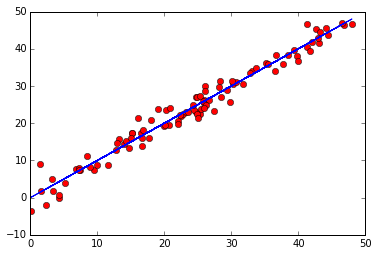

In [6]:
#After trying out a few combintions I found that the best model is the one in which x1 and x2 are excluded.
lm = smf.ols(formula='y ~ x3 + x4 + x5', data = data2).fit()
lmy = lm.predict(data2)
plt.plot(lmy,data2.y,'or')
plt.plot(lmy,lmy,'-b') 
lm.summary()

0.974061761696


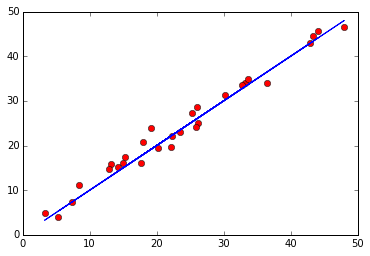

In [7]:
#Validation of the model
lm2 = smf.ols(formula='y ~ x3+x4+x5', data = data2).fit()
lm2.summary()
lmy2 = lm2.predict(validation)
plt.plot(lmy2,validation.y,'or')
plt.plot(lmy2,lmy2,'-b')
R2=1-sum(pow(lmy2-validation.y,2))/sum(pow(validation.y-mean(validation.y),2))
print(R2)

### Extra credit assignment (40% of credit to be applied toward this or further homeworks )

Using the real estate data from the lab, train and validate the multivariate linear models for predicting sales price within each zip code for the: a) single-residence, b) multiapartment houses. Consider only the zip codes having more than 500 houses to consider. Train the model over as many relevant regressors as you can (including dummy-variables expressing impact of non-real valued factors or non-linear impacts) and perform feature selection over the validaton set. This is a custom approach - feel free to frame it as you like aiming for the best possible performance over the validation sets. Report the final training and validation set R2's as a table (zip, size, R2) as well as a spatial visualization (just the validation R2 over zip code's lat-long with colors indicating the R2 value). 